In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import timedelta
import plotly.express as px
#Подгружаем библиотеки

In [2]:
customer_i = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/olist_customers_dataset.csv')
#Укажем путь к нашему файлу с уник.идентифекаторами 

In [3]:
customer_i.head()
# Глянем последние 5 строк нашего датафрейма

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customer_i.shape
# Проверим колл-во строк в датафрейме

(99441, 5)

In [5]:
customer_i.dtypes
# Проверим типы данных

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [6]:
customer_i.isna().sum()
# Проверим null-ы и посчитаем сколько их в сумме

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
orders_i = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/olist_orders_dataset.csv', parse_dates=[3, 4, 5, 6, 7])
# Прочитаем наш файл с заказами
# Сразу преобразуем колонки в datetime

In [8]:
orders_i.head()
# Посмотрим на датафрейм

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [9]:
orders_i.shape

(99441, 8)

In [10]:
orders_i.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [11]:
orders_i.isna().sum()
# Проверим на NULL-ы и увидим что они есть

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [12]:
items_i = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/olist_order_items_dataset.csv', parse_dates=[4])
# продгрузем датафрейм с товарными позицыями, входящими в заказы
# Пропарсим даты

In [13]:
items_i.head()
# Посмотрим на датафрейм

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
items_i.isna().sum()
# Посмотрим на колл-во NULL-ов

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [15]:
items_i.shape
# Гляне кол-во строк

(112650, 7)

In [16]:
items_i.dtypes
# Убедимся в преобразовании в datetime

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

# 1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [17]:
sales_1 = customer_i.groupby('customer_unique_id', as_index=False).customer_id.count().sort_values('customer_id', ascending=False)
sales_1.head()
# Сначала группируем по уникальным айдишникам и выключаем индексацию строк,
# после чего считаем с помощью count колл-во идентификаторов на уников,
# далее сортируем customer_id по убыванию ascending=False

,customer_unique_id,customer_id
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17
23472,3e43e6105506432c953e165fb2acf44c,9
37797,6469f99c1f9dfae7733b25662e7f1782,7
76082,ca77025e7201e3b30c44b472ff346268,7
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7


In [18]:
customer_items = customer_i.merge(orders_i, how='inner', on='customer_id')
customer_items.head()
# оьединим таблицы для того, что бы объединить айди и заказы
# С помощью merge обозначим что объединяем таблицу customer с таблицей orders, куда передадим
# метод объединения inner join возвращая только совпадающие строки, объединяем по customer_id, так как 
# в обеих таблицах эта колонка присутствует

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [19]:
orders_i.nunique()
# Проверим колл-во уник строк в таблице

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [20]:
customer_i.nunique()
# Проверим колл-во уник строк в таблице

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [21]:
customer_items[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']] \
    = customer_items[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']] \
    .fillna(value= 0 )
# Передавая в fillna значение - 0, мы меняем NULL-ы на нули, так ка кс NULL нельзя работать

In [22]:
customer_items.dtypes
# Проверим изменения

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [23]:
customer_items.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [24]:
one_sales = customer_items.query('order_status == "delivered" and order_approved_at != 0') \
    .groupby('customer_unique_id', as_index=False).order_id.count() \
    .rename(columns={'order_id': 'nuum_orders'}) \
    .query('nuum_orders == 1')

one_sales.head()
# Создадим новую переменную где отфильтруем статус заказа на "Доставлен"
# далее сгруппируем результат по уникальным айдишникам и отключаем индексацию строк
# далее с помощью count() подсчитываем колл-во чеков на айдишник
# и фильтруем с помощью query нашу колонку, для того, что бы оставить только тех, кто совершил одну покупку

,customer_unique_id,nuum_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [25]:
one_sales.count()
# в конце - Посмотрим, ссколько уникальных айдишников совершили покупку только один раз
# в конеччном итоге сделаем вывод что один раз совершили покупку 90545 пользователей

customer_unique_id    90545
nuum_orders           90545
dtype: int64

# 2 Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)

In [26]:
customer_items.order_status.nunique()
# посмотрим сколько уникальных значений в столбце order_status
# В стобце есть два варианта событий - unaviable это недоступный заказ и отменённый - canceled

8

In [27]:
# customer_items.order_status.value_counts().sort_values()
# Посмотрим сколько раз то или иное значение встречается в определённой каатегории от меньшего к большему

In [28]:
customer_items['order_purchase_timestamp'] = customer_items['order_purchase_timestamp'].dt.strftime('%Y-%m')
# Превращаем колонку в формат даты и времени, для того, что бы посмотреть на недоставленые заказы по год и месяцу

In [29]:
customer_items

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


In [30]:
y_m_orders_items = customer_items \
                    .query('order_status=="canceled" or order_status=="unavailable"') \
                    .groupby(['order_status', 'order_purchase_timestamp'], as_index=False) \
                    .order_id.count() \
                    .rename(columns={'order_id': 'order_summary'}) \
                    .sort_values(['order_status', 'order_purchase_timestamp'], ascending=False)

# Для начала отфильтруем данные в столбце по значениям canceled и unavailable
# далее сгруппируем по статусу заказа и дате, когда к этому заказу был применён статус
# далее посчитаем колличество заказов по айдишникамм пользователей
# поссле чего переименуем колонку, что бы видеть посчитанный суммарный результат
# далее отсортируем по статусу заказа и по дате от  большей даты к меньшей

In [31]:
y_m_orders_items.head()

,order_status,order_purchase_timestamp,order_summary
44,unavailable,2018-08,7
43,unavailable,2018-07,18
42,unavailable,2018-06,4
41,unavailable,2018-05,16
40,unavailable,2018-04,5


In [32]:
canceled_summary = y_m_orders_items.query('order_status=="canceled"').order_summary.sum() / y_m_orders_items.query('order_status=="canceled"').order_purchase_timestamp.count()
# Посчитаем колличество отменённых заказов, разделив их на месяцы, когда он был отменён

In [33]:
canceled_summary.round(2)
# Окгруглим наш результат до 2-х знакв после запятой
# Тем самым увидим, что из-за отмены заказов в средне не доставляется 26.04 заказа

26.04

In [34]:
unavailable_summary = y_m_orders_items.query('order_status=="unavailable"').order_summary.sum() / y_m_orders_items.query('order_status=="unavailable"').order_purchase_timestamp.count()
#Тоже самое сделаемм и с недоступными пользователю заказами
# А здесь увидим то, что из-за того, что товар не доступен - не оставляется в среднем 29 заказов

In [35]:
unavailable_summary.round(2)
# Снова округляем до 2-х знаков после запятой

29.0

In [36]:
import seaborn as sn

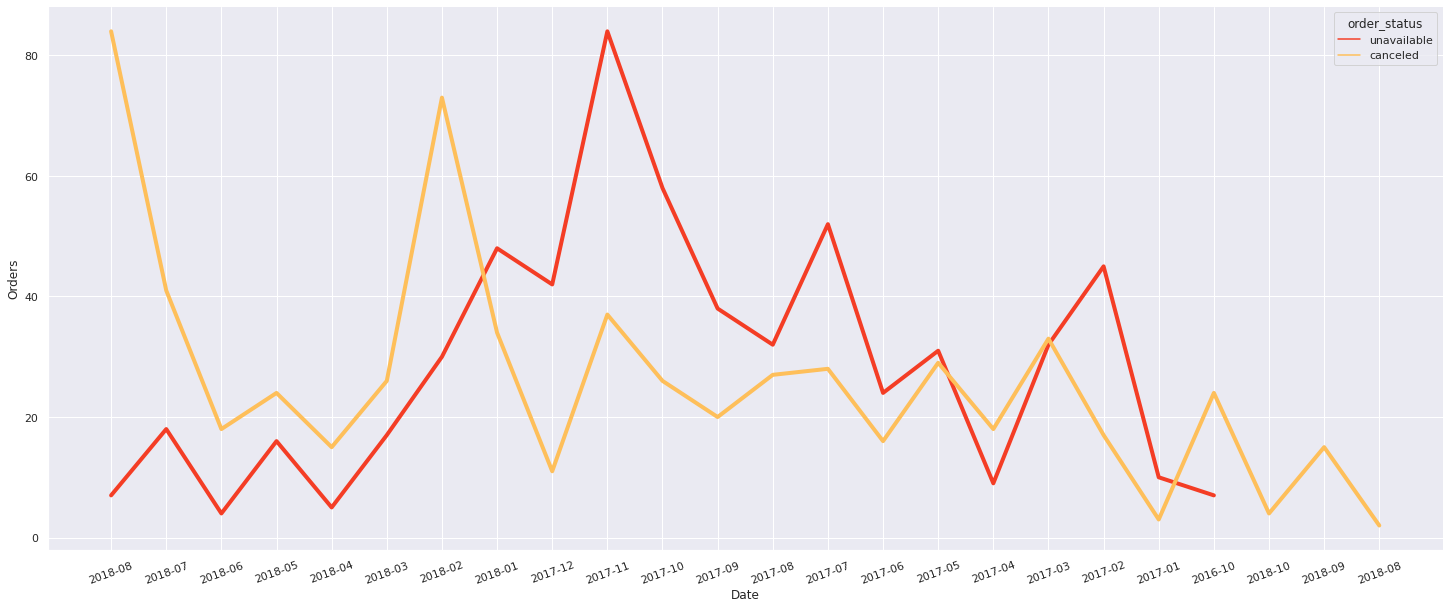

In [38]:
plt.figure(figsize=(25, 10))
ax = sns.lineplot(x='order_purchase_timestamp', y='order_summary', hue='order_status', linewidth = 4, data=y_m_orders_items, palette="YlOrRd_r")
ax.set(xlabel='Date', ylabel='Orders')
ax.set_xticklabels(y_m_orders_items.order_purchase_timestamp, rotation=20)
sn.set(style="darkgrid")
sns.despine()
plt.show()
# Построим график распределения unavilable и canceled заказов по датам